In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

tf.set_random_seed(777)

1.9.0


In [2]:
learning_rate = 0.001
training_epochs = 20
batch_size = 100

In [3]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
    buffer_size=100000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).shuffle(
    buffer_size=100000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()

In [6]:
iterator = tf.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)
images, labels = iterator.get_next()

In [7]:
train_init = iterator.make_initializer(train_dataset)
test_init = iterator.make_initializer(test_dataset)

In [8]:
vec_images = tf.reshape(images, [-1, 28, 28, 1])
vec_images = tf.cast(vec_images, tf.float32) / 255.
onehot_labels = tf.one_hot(labels, 10)

In [9]:
is_train = tf.placeholder(tf.bool)

In [10]:
tf.layers.batch_normalization?

In [11]:
L1 = tf.layers.conv2d(inputs=vec_images, filters=32, kernel_size=[3, 3], padding='SAME')
L1 = tf.layers.batch_normalization (L1, training=is_train)
L1 = tf.nn.relu(L1)
L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2, 2], padding='SAME', strides=2)
#L1 = tf.layers.dropout(inputs=L1, rate=0.3, training=is_train)
L2 = tf.layers.conv2d(inputs=L1        , filters=64, kernel_size=[3, 3], padding='SAME')
L2 = tf.layers.batch_normalization (L2, training=is_train)
L2 = tf.nn.relu(L2)
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2, 2], padding='SAME', strides=2)
#L2 = tf.layers.dropout(inputs=L2, rate=0.3, training=is_train)
L3 = tf.layers.conv2d(inputs=L2        , filters=128, kernel_size=[3, 3], padding='SAME')
L3 = tf.layers.batch_normalization (L3, training=is_train)
L3 = tf.nn.relu(L3)
L3 = tf.layers.max_pooling2d(inputs=L3, pool_size=[2, 2], padding='SAME', strides=2)
#L3 = tf.layers.dropout(inputs=L3, rate=0.3, training=is_train)
L3

<tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 4, 4, 128) dtype=float32>

In [12]:
L3_flat = tf.layers.flatten(L3)
L4 = tf.layers.dense(inputs=L3_flat, units=256)
L4 = tf.layers.batch_normalization(L4, training=is_train)
L4 = tf.nn.relu(L4)
L4 = tf.layers.dropout(inputs=L4, rate=0.4, training=is_train)
hypothesis = tf.layers.dense(inputs=L4, units=10)

In [13]:
tf.trainable_variables()

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32_ref>,
 <tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/gamma:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/beta:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/gamma:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'conv2d_2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_2/gamma:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_2/beta:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense/kernel:0' shape=(2048, 256) dtype=float32_ref>,
 <tf.Variable 'dense/bias:0' shape=(256,) dtype=float3

In [14]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32_ref>,
 <tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/gamma:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/beta:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/gamma:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'conv2d_2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_2/gamma:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_2/beta:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense/kernel:0' shape=(2048, 256) dtype=float32_ref>,
 <tf.Variable 'dense/bias:0' shape=(256,) dtype=float3

In [15]:
tf.get_collection(tf.GraphKeys.UPDATE_OPS)

[<tf.Operation 'batch_normalization/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'batch_normalization/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'batch_normalization_1/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'batch_normalization_1/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'batch_normalization_2/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'batch_normalization_2/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'batch_normalization_3/cond_2/Merge' type=Merge>,
 <tf.Operation 'batch_normalization_3/cond_3/Merge' type=Merge>]

In [16]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=hypothesis, labels=onehot_labels))
global_step = tf.Variable(0, trainable=False)
lr_decay = tf.train.exponential_decay(learning_rate=learning_rate,
                                          global_step= global_step,
                                          decay_steps=6000,
                                          decay_rate= 0.1,
                                          staircase=True)
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer(learning_rate=lr_decay).minimize(
       cost, global_step=global_step)
#optimizer = tf.train.AdamOptimizer(learning_rate=lr_decay).minimize(cost, global_step=global_step)

In [17]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(onehot_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth =True)))
sess.run(tf.global_variables_initializer())

In [19]:
# train my model
print('Learning started. It takes sometime.')
max_test_acc = 0.
for epoch in range(training_epochs):
    avg_cost = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    
    total_batch = int(train_images.shape[0] / batch_size)
    total_batch_test = int(test_images.shape[0] / batch_size)
    
    sess.run(train_init)
    for i in range(total_batch):
        acc, c, _ = sess.run([accuracy, cost, optimizer], feed_dict={is_train: True})
        avg_cost += c / total_batch
        avg_train_acc += acc / total_batch
        
    sess.run(test_init)        
    for i in range(total_batch_test):
        acc = sess.run(accuracy, feed_dict={is_train: False})
        avg_test_acc += acc / total_batch_test

    print('Epoch:', '{}'.format(epoch + 1), 'cost =', '{:.8f}'.format(avg_cost), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))


print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 cost = 0.37836305 train accuracy =  0.8641 test accuracy =  0.8757
Epoch: 2 cost = 0.24671401 train accuracy =  0.9109 test accuracy =  0.8823
Epoch: 3 cost = 0.20501635 train accuracy =  0.9257 test accuracy =  0.9002
Epoch: 4 cost = 0.17504014 train accuracy =  0.9364 test accuracy =  0.8916
Epoch: 5 cost = 0.15091111 train accuracy =  0.9438 test accuracy =  0.8934
Epoch: 6 cost = 0.12874104 train accuracy =  0.9523 test accuracy =  0.9040
Epoch: 7 cost = 0.11107808 train accuracy =  0.9581 test accuracy =  0.8855
Epoch: 8 cost = 0.09743495 train accuracy =  0.9636 test accuracy =  0.9019
Epoch: 9 cost = 0.08405676 train accuracy =  0.9678 test accuracy =  0.9079
Epoch: 10 cost = 0.07428460 train accuracy =  0.9722 test accuracy =  0.9078
Epoch: 11 cost = 0.05057439 train accuracy =  0.9820 test accuracy =  0.9268
Epoch: 12 cost = 0.03607999 train accuracy =  0.9882 test accuracy =  0.9282
Epoch: 13 cost = 0.02934634 train accuracy =  0.

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

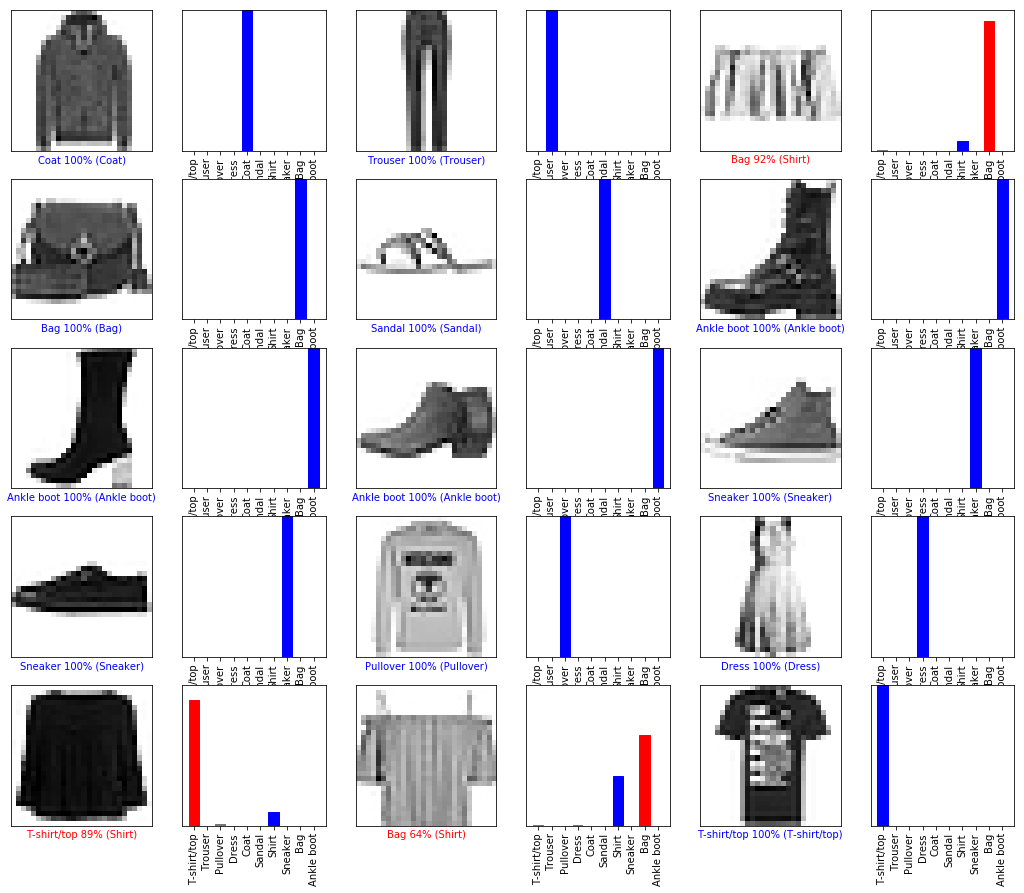

In [21]:
prob = tf.nn.softmax(hypothesis)
#sess.run(test_init)
imgs, lbs, x, y = sess.run([images, labels, vec_images, onehot_labels])
predictions = sess.run(prob, feed_dict={vec_images:x, onehot_labels:y, is_train:False})
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, lbs, imgs)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, lbs)